<h1>The Battle of Neighborhoods : Delhi vs Pune</h1>

<h2>Introduction</h2>

In this project, we will study, analyze, cluster and compare neighborhoods of two Important locations of
India: Delhi and Pune. This will act as a guide for people who leave their native place and come to a new
city to pursue their careers.
This is applicable for any city, here we consider that a newly Graduated Engineer has left his native
place in Delhi and has come to Pune to pursue his career.
We will primarily investigate how similar is the area (specific Postal Code, here we will use 110095 from
Delhi) that he has left to the area (Postal Code in Pune 411057) where he is now living. Doing this
project will also enable us to understand similarities and dissimilarities between two Locations as we will
compare neighborhoods of Delhi and Pune. 

<h2>Table Of Content</h2>

1. Download and Prepare Dataset

2. Explore Neighborhoods in Delhi and Pune

3. Analyze Each Neighborhood

4. Cluster Neighborhoods

5. Examine Clusters

Download Required Libraries.

In [1]:
#library to handle data in a vectorized manner
import numpy as np 

#library for Data Analysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

#seaborn library
import seaborn as sns

#library to handle requests
import requests 

#convert an address into latitude and longitude values
import geopy
from geopy.geocoders import Nominatim

#import k-means from clustering stage
from sklearn.cluster import KMeans

#map rendering library
import folium

<a id='item1'></a>

<h2>1. Download and Prepare Dataset.</h2>

Fetching Dataset that consists of all the Postal codes of Delhi. I am fetching it from MapsOfIndia.com which has District wise Postal Codes. Hence I will fetch Postal Codes for all Districts in Delhi and then append the datasets to make one Data frame. 

In [2]:
central_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/central-delhi/")[0]

In [3]:
central_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A.G.c.r.,110002,Delhi,Central Delhi
2,A.K.market,110055,Delhi,Central Delhi
3,Ajmeri Gate extn.,110002,Delhi,Central Delhi
4,Anand Parbat,110005,Delhi,Central Delhi


From above, we can see first row should be the Column Headers.

In [4]:
new_header = central_delhi.iloc[0]
central_delhi = central_delhi[1:]
central_delhi.columns = new_header
central_delhi.head()

,Location,Pincode,State,District
1,A.G.c.r.,110002,Delhi,Central Delhi
2,A.K.market,110055,Delhi,Central Delhi
3,Ajmeri Gate extn.,110002,Delhi,Central Delhi
4,Anand Parbat,110005,Delhi,Central Delhi
5,Anand Parbat indl. area,110005,Delhi,Central Delhi


Lets fetch Postal Codes for other Districts as well and change their first to row to Column Headers.

In [5]:
east_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/east-delhi/")[0]
east_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,Anand Vihar,110092,Delhi,East Delhi
2,Azad Nagar,110051,Delhi,East Delhi
3,Babarpur,110032,Delhi,East Delhi
4,Balbir Nagar,110032,Delhi,East Delhi


In [6]:
east_delhi = east_delhi[1:]
east_delhi.columns = new_header
east_delhi.head()

,Location,Pincode,State,District
1,Anand Vihar,110092,Delhi,East Delhi
2,Azad Nagar,110051,Delhi,East Delhi
3,Babarpur,110032,Delhi,East Delhi
4,Balbir Nagar,110032,Delhi,East Delhi
5,Bhajan Pura,110053,Delhi,East Delhi


In [7]:
new_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/new-delhi/")[0]
new_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,F F c okhla,110020,Delhi,New Delhi
2,New Delhi,110001,Delhi,New Delhi
3,New Delhi.,110001,Delhi,New Delhi


In [8]:
new_delhi = new_delhi[1:]
new_delhi.columns = new_header
new_delhi.head()

,Location,Pincode,State,District
1,F F c okhla,110020,Delhi,New Delhi
2,New Delhi,110001,Delhi,New Delhi
3,New Delhi.,110001,Delhi,New Delhi


Here in new_delhi dataframe we can see duplicate values (row 2 and row 3). I will deal with duplicate values once we append all the districts dataframe to one single dataframe.

In [9]:
north_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/north-delhi/")[0]
north_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,Baratooti,110006,Delhi,North Delhi
2,Birla Lines,110007,Delhi,North Delhi
3,Burari,110084,Delhi,North Delhi
4,C.C.i.,110007,Delhi,North Delhi


In [10]:
north_delhi = north_delhi[1:]
north_delhi.columns = new_header
north_delhi.head()

,Location,Pincode,State,District
1,Baratooti,110006,Delhi,North Delhi
2,Birla Lines,110007,Delhi,North Delhi
3,Burari,110084,Delhi,North Delhi
4,C.C.i.,110007,Delhi,North Delhi
5,Chandni Chowk,110006,Delhi,North Delhi


In [11]:
north_west_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/north-west-delhi/")[0]
north_west_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,Adrash Nagar,110033,Delhi,North West delhi
2,Alipur,110036,Delhi,North West delhi
3,Anandvas Shakurpur,110034,Delhi,North West delhi
4,Ashok Vihar,110052,Delhi,North West delhi


In [12]:
north_west_delhi = north_west_delhi[1:]
north_west_delhi.columns = new_header
north_west_delhi.head()

,Location,Pincode,State,District
1,Adrash Nagar,110033,Delhi,North West delhi
2,Alipur,110036,Delhi,North West delhi
3,Anandvas Shakurpur,110034,Delhi,North West delhi
4,Ashok Vihar,110052,Delhi,North West delhi
5,Auchandi,110039,Delhi,North West delhi


In [13]:
south_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/south-delhi/")[0]
south_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,Abul Fazal enclave-i,110025,Delhi,South Delhi
2,Air Force station tugalkabad,110062,Delhi,South Delhi
3,Alaknanda,110019,Delhi,South Delhi
4,Ali,110019,Delhi,South Delhi


In [14]:
south_delhi = south_delhi[1:]
south_delhi.columns = new_header
south_delhi.head()

,Location,Pincode,State,District
1,Abul Fazal enclave-i,110025,Delhi,South Delhi
2,Air Force station tugalkabad,110062,Delhi,South Delhi
3,Alaknanda,110019,Delhi,South Delhi
4,Ali,110019,Delhi,South Delhi
5,Aliganj,110003,Delhi,South Delhi


In [15]:
south_west_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/south-west-delhi/")[0]
south_west_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,505 A b workshop,110010,Delhi,South West delhi
2,A F palam,110010,Delhi,South West delhi
3,A F rajokari,110038,Delhi,South West delhi
4,Amberhai,110075,Delhi,South West delhi


In [16]:
south_west_delhi = south_west_delhi[1:]
south_west_delhi.columns = new_header
south_west_delhi.head()

,Location,Pincode,State,District
1,505 A b workshop,110010,Delhi,South West delhi
2,A F palam,110010,Delhi,South West delhi
3,A F rajokari,110038,Delhi,South West delhi
4,Amberhai,110075,Delhi,South West delhi
5,Anand Niketan,110021,Delhi,South West delhi


In [17]:
west_delhi = pd.read_html("https://www.mapsofindia.com/pincode/india/delhi/west-delhi/")[0]
west_delhi.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A-3 Janak puri,110058,Delhi,West Delhi
2,Ashok Nagar,110018,Delhi,West Delhi
3,Ashoka Park extn.,110026,Delhi,West Delhi
4,B-1 Janak puri,110058,Delhi,West Delhi


In [18]:
west_delhi = west_delhi[1:]
west_delhi.columns = new_header
west_delhi.head()

,Location,Pincode,State,District
1,A-3 Janak puri,110058,Delhi,West Delhi
2,Ashok Nagar,110018,Delhi,West Delhi
3,Ashoka Park extn.,110026,Delhi,West Delhi
4,B-1 Janak puri,110058,Delhi,West Delhi
5,Bakkarwala,110015,Delhi,West Delhi


Lets append all the district dataframe to make one dataframe for delhi.

In [19]:
df_raw_delhi = central_delhi.append([east_delhi,new_delhi,north_delhi,north_west_delhi,south_delhi,south_west_delhi,west_delhi], ignore_index = True	)
df_raw_delhi.head()

,Location,Pincode,State,District
0,A.G.c.r.,110002,Delhi,Central Delhi
1,A.K.market,110055,Delhi,Central Delhi
2,Ajmeri Gate extn.,110002,Delhi,Central Delhi
3,Anand Parbat,110005,Delhi,Central Delhi
4,Anand Parbat indl. area,110005,Delhi,Central Delhi


In [20]:
df_raw_delhi.tail()

,Location,Pincode,State,District
525,Tilak Nagar east,110018,Delhi,West Delhi
526,Uttam Nagar,110059,Delhi,West Delhi
527,Vikas Puri,110018,Delhi,West Delhi
528,Vishnu Garden,110018,Delhi,West Delhi
529,Zakhira,110015,Delhi,West Delhi


To Remove Duplicates.

In [21]:
df_delhi = df_raw_delhi.drop_duplicates(subset = 'Pincode', keep = 'first').reset_index(drop = True)

In [22]:
df_delhi[df_delhi['Pincode'] == '110095']

,Location,Pincode,State,District
18,Dilshad Garden,110095,Delhi,East Delhi


In [23]:
print("Shape of df_delhi: ", df_delhi.shape)

Shape of df_delhi:  (92, 4)


Check if null values are present.

In [24]:
df_delhi.isnull().sum()

0
Location    0
Pincode     0
State       0
District    0
dtype: int64

In [25]:
df_delhi.head()

,Location,Pincode,State,District
0,A.G.c.r.,110002,Delhi,Central Delhi
1,A.K.market,110055,Delhi,Central Delhi
2,Anand Parbat,110005,Delhi,Central Delhi
3,Baroda House,110001,Delhi,Central Delhi
4,Dada Ghosh bhawan,110008,Delhi,Central Delhi


Fetching Dataset that consists of all the Postal codes of Pune.

In [26]:
df_raw_pune = pd.read_html("https://www.mapsofindia.com/pincode/india/maharashtra/pune/")[0]
df_raw_pune.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A.R. shala,411004,Maharashtra,Pune
2,Afmc,411040,Maharashtra,Pune
3,Adhale Bk,410506,Maharashtra,Pune
4,Adivare,410509,Maharashtra,Pune


Making first row as Columns Header.

In [27]:
df_raw_pune = df_raw_pune[1:]
df_raw_pune.columns = new_header
df_raw_pune.head()

,Location,Pincode,State,District
1,A.R. shala,411004,Maharashtra,Pune
2,Afmc,411040,Maharashtra,Pune
3,Adhale Bk,410506,Maharashtra,Pune
4,Adivare,410509,Maharashtra,Pune
5,Agoti,413132,Maharashtra,Pune


Removing Duplicates, if any from df_raw_pune dataframe.

In [28]:
df_pune = df_raw_pune.drop_duplicates(subset = 'Pincode',keep = 'first').reset_index(drop = True)
df_pune.head()

,Location,Pincode,State,District
0,A.R. shala,411004,Maharashtra,Pune
1,Afmc,411040,Maharashtra,Pune
2,Adhale Bk,410506,Maharashtra,Pune
3,Adivare,410509,Maharashtra,Pune
4,Agoti,413132,Maharashtra,Pune


In [29]:
print("Shape of df_pune: ", df_pune.shape)

Shape of df_pune:  (136, 4)


Checking for any null Values.

In [30]:
df_pune.isnull().sum()

0
Location    0
Pincode     0
State       0
District    0
dtype: int64

In [31]:
df_pune.head()

,Location,Pincode,State,District
0,A.R. shala,411004,Maharashtra,Pune
1,Afmc,411040,Maharashtra,Pune
2,Adhale Bk,410506,Maharashtra,Pune
3,Adivare,410509,Maharashtra,Pune
4,Agoti,413132,Maharashtra,Pune


Create a Function to fetch Latitude and Longitude of repective Pincodes.

In [32]:
def get_lat_lng(pincode):
    geo = Nominatim(user_agent = 'my_application', timeout = 10)
    location = geo.geocode(pincode)
    if location == None:
        return['NA','NA']
    lat = location.latitude
    lng = location.longitude
    
    return[lat,lng]

Fetch Latitude and Longitude for all Postal Codes in Delhi.

In [33]:
df_delhi['Latitude'],df_delhi['Longitude'] = zip(*df_delhi['Pincode'].apply(get_lat_lng))

Check if any Latitude or Longitude value is NA.

In [34]:
df_delhi[(df_delhi['Latitude'] == 'NA') | (df_delhi['Longitude'] == 'NA')]

C:\Users\Abhinav Sharma\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Location,Pincode,State,District,Latitude,Longitude


In [35]:
df_delhi.head()

,Location,Pincode,State,District,Latitude,Longitude
0,A.G.c.r.,110002,Delhi,Central Delhi,28.640964,77.245468
1,A.K.market,110055,Delhi,Central Delhi,28.652506,77.213391
2,Anand Parbat,110005,Delhi,Central Delhi,53.177378,63.605663
3,Baroda House,110001,Delhi,Central Delhi,41.729286,123.440516
4,Dada Ghosh bhawan,110008,Delhi,Central Delhi,53.231958,63.661929


In [36]:
df_delhi = df_delhi[((df_delhi['Latitude']>26.00 ) & (df_delhi['Latitude']<30.00)) & ((df_delhi['Longitude']>75.00 ) & (df_delhi['Longitude']<79.00))].reset_index(drop = True)

In [37]:
df_delhi.head()

,Location,Pincode,State,District,Latitude,Longitude
0,A.G.c.r.,110002,Delhi,Central Delhi,28.640964,77.245468
1,A.K.market,110055,Delhi,Central Delhi,28.652506,77.213391
2,Delhi High court,110003,Delhi,Central Delhi,28.598730,77.222995
3,Hauz Qazi,110006,Delhi,Central Delhi,28.655984,77.231623
4,Rajender Nagar,110060,Delhi,Central Delhi,28.638871,77.186188


Fetch Latitude and Longitude for all Postal Codes in Pune.

In [38]:
df_pune['Latitude'],df_pune['Longitude'] = zip(*df_pune['Pincode'].apply(get_lat_lng))

Check if any Latitude or Longitude value is NA. 

In [39]:
df_pune[(df_pune['Latitude'] == 'NA') | (df_pune['Longitude'] == 'NA')]

,Location,Pincode,State,District,Latitude,Longitude
28,Arvi,412401,Maharashtra,Pune,NA,NA
35,Avsari Kh,412405,Maharashtra,Pune,NA,NA
55,Bibi,410513,Maharashtra,Pune,NA,NA
61,C M e,411031,Maharashtra,Pune,NA,NA
70,Daundaj,412305,Maharashtra,Pune,NA,NA
71,Dawanewadi,412311,Maharashtra,Pune,NA,NA
82,Gangapur Kh,410516,Maharashtra,Pune,NA,NA
100,Kandali,412412,Maharashtra,Pune,NA,NA
102,Karegaon,412220,Maharashtra,Pune,NA,NA
115,Lohogaon,411047,Maharashtra,Pune,NA,NA


Drop Postal Codes of Pune where Latitude or Longitude is NA.

In [40]:
df_pune.drop(df_pune[df_pune['Latitude'] == 'NA'].index, axis = 0, inplace = True)

Check again if any Latitude or Longitude is NA.

In [41]:
df_pune[(df_pune['Latitude'] == 'NA') | (df_pune['Longitude'] == 'NA')]

,Location,Pincode,State,District,Latitude,Longitude


In [42]:
df_pune.reset_index(drop = True, inplace = True)

In [43]:
print("Shape of df_pune: ",df_pune.shape)

Shape of df_pune:  (123, 6)


In [44]:
df_pune.head()

,Location,Pincode,State,District,Latitude,Longitude
0,A.R. shala,411004,Maharashtra,Pune,18.5087,73.8309
1,Afmc,411040,Maharashtra,Pune,18.484,73.9017
2,Adhale Bk,410506,Maharashtra,Pune,18.6071,73.6912
3,Adivare,410509,Maharashtra,Pune,19.1053,73.6923
4,Agoti,413132,Maharashtra,Pune,18.2188,74.8849


In [45]:
df_pune = df_pune[((df_pune['Latitude']>16.00 ) & (df_pune['Latitude']<20.00)) & ((df_pune['Longitude']>70.00 ) & (df_pune['Longitude']<75.00))].reset_index(drop = True)

In [46]:
df_pune.head()

,Location,Pincode,State,District,Latitude,Longitude
0,A.R. shala,411004,Maharashtra,Pune,18.5087,73.8309
1,Afmc,411040,Maharashtra,Pune,18.484,73.9017
2,Adhale Bk,410506,Maharashtra,Pune,18.6071,73.6912
3,Adivare,410509,Maharashtra,Pune,19.1053,73.6923
4,Agoti,413132,Maharashtra,Pune,18.2188,74.8849


<h4>Create a Map of Delhi with Locations superimposed over it.</h4>

In [47]:
#fetch Latitude and Longitude of Delhi and Pune.

lat_delhi,lng_delhi = get_lat_lng("Delhi")
print('The geograpical coordinate of Delhi are {}, {}.'.format(lat_delhi, lng_delhi))

lat_pune,lng_pune = get_lat_lng("Pune")
print('The geograpical coordinate of Pune are {}, {}.'.format(lat_pune, lng_pune))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.
The geograpical coordinate of Pune are 18.521428, 73.8544541.


In [48]:
# create map of Delhi using latitude and longitude values
map_delhi = folium.Map(location=[lat_delhi, lng_delhi], zoom_start=10.5)

# add markers to map
for lat, lng, state, location in zip(df_delhi['Latitude'], df_delhi['Longitude'], df_delhi['State'], df_delhi['Location']):
    label = '{}, {}'.format(location, state)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#FF9933',
        fill_opacity=0.7,
        parse_html=False).add_to(map_delhi)  
    
map_delhi

<h4>Create a Map of Pune with Locations superimposed over it.</h4>

In [49]:
# create map of Pune using latitude and longitude values
map_pune = folium.Map(location=[lat_pune, lng_pune], zoom_start=10)

# add markers to map
for lat, lng, district, location in zip(df_pune['Latitude'], df_pune['Longitude'], df_pune['District'], df_pune['Location']):
    label = '{}, {}'.format(location, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#FFFFFF',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pune)  
    
map_pune

<h4>Foursquare Credentials</h4>

In [50]:
client_id = '0B4WXL0Z5MGQVSKJDPFBULYRX1DCQ3OJN0555KKST3D55SUH'
client_secret = 'YFIYIOWSEAPPPFZPSJVELKZ14ABGT1MR3ZXPCHECJLVSF1TR'
version = '20200420'

<a id='item2'></a>

<h2>2. Explore neighborhoods in Delhi and Pune.</h2>

Create a function to get near by venues of a neighboehoods.

In [51]:
def get_near_by_venues(names, latitudes, longitudes, radius = 2000, limit = 50):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            client_id, 
            client_secret, 
            version, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']) for venue in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Fetch Venues for Neighborhoods in Delhi.

In [52]:
venues_delhi = get_near_by_venues(names = df_delhi['Location'],
                                  latitudes = df_delhi['Latitude'],
                                  longitudes = df_delhi['Longitude']
                                 )

Check the shape and head of venues_delhi.

In [53]:
print("Shape of venues_delhi: ",venues_delhi.shape)
venues_delhi.head()

Shape of venues_delhi:  (1930, 7)


,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A.G.c.r.,28.640964,77.245468,Changezi Chicken,28.643751,77.240486,Indian Restaurant
1,A.G.c.r.,28.640964,77.245468,Bengali Market | बंगाली मार्केट | বাংলা বাজার,28.629498,77.232020,Indian Restaurant
2,A.G.c.r.,28.640964,77.245468,Karim's | करीम | کریم (Karim's),28.649498,77.233691,Indian Restaurant
3,A.G.c.r.,28.640964,77.245468,Hotel Broadway New Delhi,28.641058,77.237908,Hotel
4,A.G.c.r.,28.640964,77.245468,Feroz Shah Kotla Stadium | फिरोज शाह कोटला स्ट...,28.637907,77.241869,Cricket Ground


Fetch Venues for Neighborhoods in Pune.

In [54]:
venues_pune = get_near_by_venues(names = df_pune['Location'],
                                  latitudes = df_pune['Latitude'],
                                  longitudes = df_pune['Longitude']
                                 )

Check the shape and head of venues_pune.

In [55]:
print("Shape of venues_pune: ",venues_pune.shape)
venues_pune.head()

Shape of venues_pune:  (1547, 7)


,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A.R. shala,18.508727,73.830869,Nisarg (निसर्ग),18.506737,73.832017,Seafood Restaurant
1,A.R. shala,18.508727,73.830869,Cafe Cofee Day,18.508026,73.831636,Café
2,A.R. shala,18.508727,73.830869,Aasing's Kitchen,18.514030,73.828750,Burger Joint
3,A.R. shala,18.508727,73.830869,Le Plaisir,18.514205,73.838551,Bistro
4,A.R. shala,18.508727,73.830869,Pastry Corner,18.508920,73.830565,Bakery


Check top 10 Venue Category of Delhi.

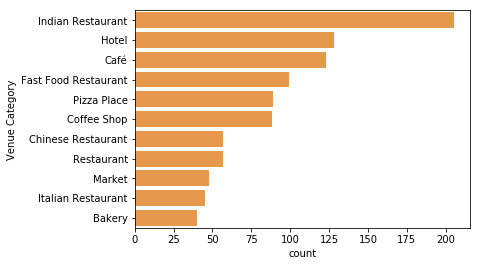

In [56]:
sns.countplot(y = 'Venue Category', data = venues_delhi, order = venues_delhi['Venue Category'].value_counts().iloc[:11].index, color = "#FF9933")

Check top 10 Venue Category of Pune.

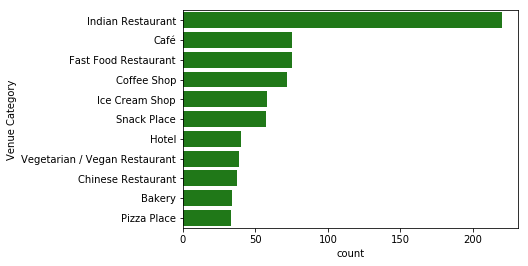

In [57]:
sns.countplot(y = 'Venue Category', data = venues_pune, order = venues_pune['Venue Category'].value_counts().iloc[:11].index, color = "#138808")

<h4>Insight: </h4>"Indian Restaurant" is clearly a favourite choice in both Delhi and Pune. But in Delhi, second most opened place is "Hotel" wheras in Pune its "Cafe". One of the Possible reason could be that Delhi is capital of India so its more likely to have tourists. Hence more number of Hotels.

 <h4>Now let's first compare specific Postal Codes from both Locations: 110095(Dilshad Garden, Delhi) vs 411057(Rajiv Gandhi Infotech Park, Pune).</h4>

In [58]:
venues_110095 = venues_delhi[venues_delhi['Location'].str.lower() == 'dilshad garden' ]
venues_110095.reset_index(drop = True, inplace = True)

In [59]:
venues_110095.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Dilshad Garden,28.668089,77.313461,Y.S.C - Yamuna Sports Complex,28.664500,77.312847,Athletics & Sports
1,Dilshad Garden,28.668089,77.313461,Yamuna Sports Complex,28.664257,77.320179,Pool
2,Dilshad Garden,28.668089,77.313461,Cafe Wink,28.657311,77.317098,Italian Restaurant
3,Dilshad Garden,28.668089,77.313461,The Leela Ambience Delhi Convention Hotel,28.662089,77.302429,Hotel
4,Dilshad Garden,28.668089,77.313461,Barbeque Nation,28.665840,77.304094,BBQ Joint


In [60]:
print("Shape of venues_110095: ", venues_110095.shape)

Shape of venues_110095:  (23, 7)


In [61]:
venues_411057 = venues_pune[venues_pune['Location'].str.lower() == 'infotech park (hinjawadi)' ]
venues_411057.reset_index(drop = True, inplace = True)

In [62]:
venues_411057.head()

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Infotech park (hinjawadi),18.59393,73.741764,Little Italy,18.591513,73.743668,Italian Restaurant
1,Infotech park (hinjawadi),18.59393,73.741764,MoMo Cafe,18.591650,73.747011,Indian Restaurant
2,Infotech park (hinjawadi),18.59393,73.741764,Courtyard by Marriott,18.591591,73.746877,Hotel
3,Infotech park (hinjawadi),18.59393,73.741764,The Gateway HOTEL,18.591914,73.744877,Hotel
4,Infotech park (hinjawadi),18.59393,73.741764,Natural Ice Cream,18.591192,73.752440,Ice Cream Shop


In [63]:
print("Shape of venues_411047: ", venues_411057.shape)

Shape of venues_411047:  (45, 7)


<h4>Create a Map of venues_110095 with Locations superimposed over it.</h4>

In [64]:
# create map of 110095 Postal Code using latitude and longitude values
map_110095 = folium.Map(location=[venues_110095['Location Latitude'][0], venues_110095['Location Longitude'][0]], zoom_start=14)

# add markers to map
for lat, lng, venue, location in zip(venues_110095['Venue Latitude'], venues_110095['Venue Longitude'], venues_110095['Venue'], venues_110095['Location']):
    label = '{}, {}'.format(venue,location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#800000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_110095)  
    
map_110095

<h4>Create a Map of venues_411057 with Locations superimposed over it.</h4>

In [65]:
# create map of 411057 Postal Code using latitude and longitude values
map_411057 = folium.Map(location=[venues_411057['Location Latitude'][0], venues_411057['Location Longitude'][0]], zoom_start=15)

# add markers to map
for lat, lng, venue, location in zip(venues_411057['Venue Latitude'], venues_411057['Venue Longitude'], venues_411057['Venue'], venues_411057['Location']):
    label = '{}, {}'.format(venue,location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#008080',
        fill_opacity=0.7,
        parse_html=False).add_to(map_411057)  
    
map_411057

Check top 10 Venues in Postal Code 110095.

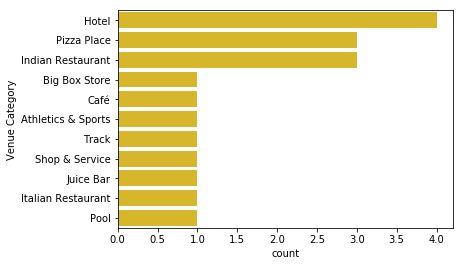

In [66]:
sns.countplot(y = 'Venue Category', data = venues_110095, order = venues_110095['Venue Category'].value_counts().iloc[:11].index, color = "#F2C80F")

Check top 10 Venues in Postal Code 411057.

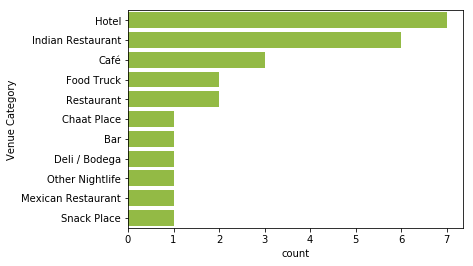

In [67]:
sns.countplot(y = 'Venue Category', data = venues_411057, order = venues_411057['Venue Category'].value_counts().iloc[:11].index, color = "#9ACD32")

<h4>Insight: </h4>
"Hotel" is the most popular place in both Postal Codes, but Rajiv Gandhi Infotech Park(Hinjawadi) has a greater number of hotels as compared to Dilshad Garden. Also, Rajiv Gandhi Infotech Park(Hinjawadi) has a greater number of Food Venues as compared to Dilshad Garden. 

One possible reason could be that Rajiv Gandhi Infotech Park(Hinjawadi) is an IT hub. All big IT companies are present here, which justifies a greater number of hotels, multicuisine restaurants, cafe etc. Whereas Dilshad Garden is more of a residential area. 

<a id='item3'></a>

<h2>3. Analyze Each Neighborhood.</h2>

We will first Analyze Neighborhood of Dilshad Garden (Postal Code : 110095) and Rajiv Gandhi Infotech Park (Postal Code : 411057) and then proceed for Delhi and Pune. 
So first combine the venues_110095 and venues_411057 to make venues_dilne.

In [68]:
venues_dilne = venues_110095.append([venues_411057], ignore_index = True)
print("Shape of venues_dilne: ",venues_dilne.shape)

Shape of venues_dilne:  (68, 7)


In [69]:
# one hot encoding
venues_dilne_onehot = pd.get_dummies(venues_dilne[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_dilne_onehot['Location'] = venues_dilne['Location'] 

# move neighborhood column to the first column
fixed_columns = [venues_dilne_onehot.columns[-1]] + list(venues_dilne_onehot.columns[:-1])
venues_dilne_onehot = venues_dilne_onehot[fixed_columns]

venues_dilne_onehot.head()

,Location,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Big Box Store,Breakfast Spot,Buffet,Café,Chaat Place,Chinese Restaurant,Deli / Bodega,Department Store,Diner,Fast Food Restaurant,Food Court,Food Truck,Golf Course,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Juice Bar,Lounge,Mexican Restaurant,Motel,Multiplex,Other Nightlife,Park,Pizza Place,Pool,Restaurant,Sandwich Place,Shop & Service,Shopping Mall,Snack Place,Tea Room,Track,Vegetarian / Vegan Restaurant
0,Dilshad Garden,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Dilshad Garden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Dilshad Garden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Dilshad Garden,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Dilshad Garden,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
print("Shape of venues_dilne_onehot: ", venues_dilne_onehot.shape)

Shape of venues_dilne_onehot:  (68, 42)


<h4>Next, let's group rows by Location and by taking the mean of the frequency of occurrence of each category.</h4>

In [71]:
venues_dilne_grouped = venues_dilne_onehot.groupby('Location').mean().reset_index()
venues_dilne_grouped

,Location,American Restaurant,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Big Box Store,Breakfast Spot,Buffet,Café,Chaat Place,Chinese Restaurant,Deli / Bodega,Department Store,Diner,Fast Food Restaurant,Food Court,Food Truck,Golf Course,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Juice Bar,Lounge,Mexican Restaurant,Motel,Multiplex,Other Nightlife,Park,Pizza Place,Pool,Restaurant,Sandwich Place,Shop & Service,Shopping Mall,Snack Place,Tea Room,Track,Vegetarian / Vegan Restaurant
0,Dilshad Garden,0.000000,0.043478,0.043478,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.173913,0.000000,0.000000,0.130435,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.130435,0.043478,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.043478,0.000000
1,Infotech park (hinjawadi),0.022222,0.000000,0.000000,0.022222,0.022222,0.022222,0.000000,0.022222,0.022222,0.066667,0.022222,0.022222,0.022222,0.022222,0.000000,0.022222,0.022222,0.044444,0.022222,0.155556,0.022222,0.022222,0.133333,0.022222,0.000000,0.022222,0.022222,0.022222,0.022222,0.022222,0.000000,0.000000,0.000000,0.044444,0.022222,0.000000,0.000000,0.022222,0.022222,0.000000,0.022222


Write a function to sort the venues in descending order.

In [72]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 20 venues for each Location.

In [73]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Location'] = venues_dilne_grouped['Location']

for ind in np.arange(venues_dilne_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_dilne_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Dilshad Garden,Hotel,Pizza Place,Indian Restaurant,Athletics & Sports,Shopping Mall,Shop & Service,BBQ Joint,Pool,Park,Diner,Asian Restaurant,Track,Café,Juice Bar,Italian Restaurant,Big Box Store,Deli / Bodega,Chaat Place,Chinese Restaurant,Vegetarian / Vegan Restaurant
1,Infotech park (hinjawadi),Hotel,Indian Restaurant,Café,Food Truck,Restaurant,Deli / Bodega,Golf Course,Food Court,Fast Food Restaurant,Department Store,Vegetarian / Vegan Restaurant,Chinese Restaurant,Ice Cream Shop,Buffet,Breakfast Spot,Bar,Bakery,BBQ Joint,Chaat Place,IT Services


<h4>Insight:</h4>Both Locations Dilshad Garden and Infotech Park have number of eating options. Both locations have Restaurants, BBQ Joints, Cafes etc in common which makes it a lot easier for someone to adjust in terms of Food.

One of the Biggest Difference is presence of IT services in Pune. Infotech Park as its name says is an IT hub. Whereas there is no such venue in Dilshad Garden.

This is why many people from differnt parts of country to Pune as it is one of the IT Hubs in India.

<h4>Now, let's do same for Delhi and Pune.</h4>

Combine venues_delhi and venues_pune to make venues_delne.

In [74]:
venues_delne = venues_delhi.append([venues_pune],ignore_index = True)
print("Shape of venues_delne: ", venues_delne.shape)

Shape of venues_delne:  (3477, 7)


In [75]:
# one hot encoding
venues_delne_onehot = pd.get_dummies(venues_delne[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_delne_onehot['Location'] = venues_delne['Location'] 

# move neighborhood column to the first column
fixed_columns = [venues_delne_onehot.columns[-1]] + list(venues_delne_onehot.columns[:-1])
venues_delne_onehot = venues_delne_onehot[fixed_columns]

venues_delne_onehot.head()

,Location,ATM,Accessories Store,Airport Food Court,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Astrologer,Athletics & Sports,Australian Restaurant,Auto Garage,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Baseball Stadium,Beach,Beach Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bike Shop,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Buffet,Burger Joint,Burmese Restaurant,Bus Station,Cafeteria,Café,Campground,Candy Store,Casino,Chaat Place,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,Neighborhood,Nightclub,Nightlife Spot,North Indian Restaurant,Northeast Indian Restaurant,Office,Other Great Outdoors,Other Nightlife,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Photography Studio,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Punjabi Restaurant,Recreation Center,Resort,Restaurant,River,Road,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Spiritual Center,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Tapas Restaurant,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Toll Plaza,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,University,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Zoo
0,A.G.c.r.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A.G.c.r.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A.G.c.r.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [76]:
print("Shape of venues_delne_onehot: ", venues_delne_onehot.shape)

Shape of venues_delne_onehot:  (3477, 213)


<h4>Next, let's group rows by Location and by taking the mean of the frequency of occurrence of each category.</h4>

In [77]:
venues_delne_grouped = venues_delne_onehot.groupby('Location').mean().reset_index()
print("Shape of venues_delne_grouped: ",venues_delne_grouped.shape)

Shape of venues_delne_grouped:  (163, 213)


Now let's create the new dataframe and display the top 10 venues for each Location.

In [78]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
delne_venues_sorted = pd.DataFrame(columns=columns)
delne_venues_sorted['Location'] = venues_delne_grouped['Location']

for ind in np.arange(venues_delne_grouped.shape[0]):
    delne_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_delne_grouped.iloc[ind, :], num_top_venues)

delne_venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A F rajokari,Hotel,Indian Restaurant,Restaurant,Fast Food Restaurant,Shopping Mall,Café,Multiplex,Bar,American Restaurant,Gym
1,A-3 Janak puri,Indian Restaurant,Pizza Place,Fast Food Restaurant,Café,Sandwich Place,Coffee Shop,Chinese Restaurant,Metro Station,Restaurant,BBQ Joint
2,A.G.c.r.,Indian Restaurant,Hotel,Flea Market,Bakery,Café,Mosque,Frozen Yogurt Shop,Stadium,Restaurant,Light Rail Station
3,A.K.market,Hotel,Indian Restaurant,Snack Place,Dessert Shop,Market,Pizza Place,Fast Food Restaurant,Restaurant,Indian Chinese Restaurant,Café
4,A.R. shala,Café,Indian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,South Indian Restaurant,Seafood Restaurant,Fast Food Restaurant,Gym / Fitness Center,Pizza Place,Bistro


<a id='item4'></a>

<h2>4. Cluster Neighborhoods</h2>

This section we will compare Delhi and Pune.

To use KMEANS, we need k value i.e. number of clusters. For this we will use yellowbrick module's method kelbow_visualizer(). 

In [79]:
delne_grouped_clustering = venues_delne_grouped.drop('Location', 1)

C:\Users\Abhinav Sharma\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Abhinav Sharma\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


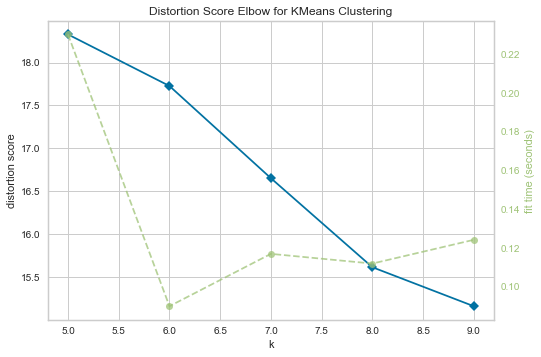

In [80]:
kmeans = KMeans()

#import yellobrick's KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(5,10))

visualizer.fit(delne_grouped_clustering)
visualizer.show() 

*k*-means to cluster the locations into 6 clusters.

In [81]:
# set number of clusters
kclusters = 6


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delne_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2])

Create a new dataframe that includes the cluster label as well as the top 10 venues for each Location.

In [82]:
# add clustering labels
delne_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [83]:
delne_venues_sorted.head() 

,Cluster Labels,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,A F rajokari,Hotel,Indian Restaurant,Restaurant,Fast Food Restaurant,Shopping Mall,Café,Multiplex,Bar,American Restaurant,Gym
1,0,A-3 Janak puri,Indian Restaurant,Pizza Place,Fast Food Restaurant,Café,Sandwich Place,Coffee Shop,Chinese Restaurant,Metro Station,Restaurant,BBQ Joint
2,0,A.G.c.r.,Indian Restaurant,Hotel,Flea Market,Bakery,Café,Mosque,Frozen Yogurt Shop,Stadium,Restaurant,Light Rail Station
3,0,A.K.market,Hotel,Indian Restaurant,Snack Place,Dessert Shop,Market,Pizza Place,Fast Food Restaurant,Restaurant,Indian Chinese Restaurant,Café
4,0,A.R. shala,Café,Indian Restaurant,Snack Place,Vegetarian / Vegan Restaurant,South Indian Restaurant,Seafood Restaurant,Fast Food Restaurant,Gym / Fitness Center,Pizza Place,Bistro


Check Number of Locations in Each CLuster.

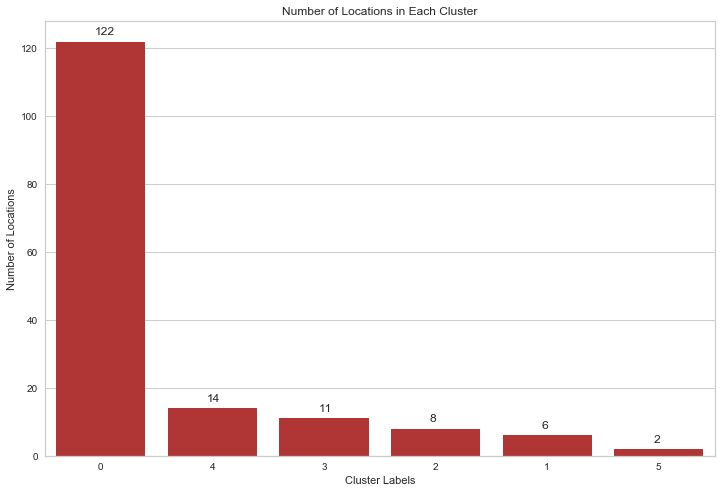

In [84]:
plt.figure(figsize=(12,8))
cluster = sns.countplot(x = 'Cluster Labels', data = delne_venues_sorted, order = delne_venues_sorted['Cluster Labels'].value_counts().iloc[:6].index, color = "#C42020")
plt.title('Number of Locations in Each Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Locations')

for p in cluster.patches:
        cluster.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+2))


In [85]:
delne_venues_sorted[delne_venues_sorted['Cluster Labels'] == 4]

,Cluster Labels,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,4,Alipur,ATM,Resort,Restaurant,Bus Station,Falafel Restaurant,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food
27,4,Anand Vihar,ATM,Clothing Store,Electronics Store,Farm,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
39,4,Auchandi,ATM,Accessories Store,Playground,Airport Food Court,Farm,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
58,4,Begumpur,ATM,Food Truck,Bakery,Restaurant,Falafel Restaurant,Fried Chicken Joint,French Restaurant,Food Court,Food & Drink Shop,Food
62,4,Bhajan Pura,ATM,Park,Astrologer,Clothing Store,Chocolate Shop,Men's Store,Pizza Place,Ice Cream Shop,IT Services,Hotel
64,4,Bhivadi,ATM,Snack Place,Breakfast Spot,Bus Station,Farmers Market,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
71,4,Bori Aindi,ATM,Indian Restaurant,Train Station,Mobile Phone Shop,Breakfast Spot,Farm,Fried Chicken Joint,French Restaurant,Food Truck,Food Court
72,4,Burari,ATM,Indian Restaurant,Mobile Phone Shop,Gift Shop,Farm,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
77,4,Chandoli Bk,ATM,Mobile Phone Shop,Museum,Farmers Market,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop
78,4,Chikhlee,ATM,Tea Room,Hotel,Photography Studio,Bakery,Indian Restaurant,Vegetarian / Vegan Restaurant,Airport Terminal,Farm,Frozen Yogurt Shop


<a id='item5'></a>

<h2>5. Examine Clusters</h2>

To plot map we need to get the latitude and longitude of Locations.

In [86]:
df_delhi_pune = df_delhi.append([df_pune], ignore_index = True)

In [87]:
df_cluster = delne_venues_sorted[['Cluster Labels','Location']]

In [88]:
df_clus_ll = df_cluster.merge(df_delhi_pune, how = 'inner', on = 'Location')

In [89]:
df_clus_ll.head()

,Cluster Labels,Location,Pincode,State,District,Latitude,Longitude
0,0,A F rajokari,110038,Delhi,South West delhi,28.5131,77.1069
1,0,A-3 Janak puri,110058,Delhi,West Delhi,28.6188,77.0864
2,0,A.G.c.r.,110002,Delhi,Central Delhi,28.641,77.2455
3,0,A.K.market,110055,Delhi,Central Delhi,28.6525,77.2134
4,0,A.R. shala,411004,Maharashtra,Pune,18.5087,73.8309


In [90]:
print("Shape of df_cluss_ll: ", df_clus_ll.shape)

Shape of df_cluss_ll:  (163, 7)


To set same color scheme for all the clusters, we define a fuction so that each cluster can be identified. This will also ensure we same same colors all the time we run this.

In [91]:
#to set same color for all the clusters
def color_cluster(cluster):
    if cluster == 0:
        return '#F2C80F'
    elif cluster == 1:
        return '#9ACD32'
    elif cluster == 2:
        return '#20B2aa'
    elif cluster == 3:
        return '#C42020'
    elif cluster == 4:
        return '#FF9933'
    elif cluster == 5:
        return '#A37B82'

First lets make Delhi Map with clusters.

In [92]:
# create map
map_cluster_delhi = folium.Map(location=[lat_delhi, lng_delhi], zoom_start=10.5)

# add markers to map
for lat, lng,location, cluster in zip(df_clus_ll['Latitude'], df_clus_ll['Longitude'], df_clus_ll['Location'], df_clus_ll['Cluster Labels']):
    label = folium.Popup(str(location) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_cluster(cluster),
        fill=True,
        fill_color=color_cluster(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster_delhi)  
    

map_cluster_delhi

Pune Map with clusters.

In [93]:
# create map
map_cluster_pune = folium.Map(location=[lat_pune, lng_pune], zoom_start=10)

# add markers to map
for lat, lng,location, cluster in zip(df_clus_ll['Latitude'], df_clus_ll['Longitude'], df_clus_ll['Location'], df_clus_ll['Cluster Labels']):
    label = folium.Popup(str(location) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color_cluster(cluster),
        fill=True,
        fill_color=color_cluster(cluster),
        fill_opacity=0.7,
        parse_html=False).add_to(map_cluster_pune)  
    

map_cluster_pune

Let's check how many locations of Delhi and Pune are available in each cluster.

In [94]:
df_clus_ll['Delhi/Pune'] = df_clus_ll['State']
df_clus_ll.head()

,Cluster Labels,Location,Pincode,State,District,Latitude,Longitude,Delhi/Pune
0,0,A F rajokari,110038,Delhi,South West delhi,28.5131,77.1069,Delhi
1,0,A-3 Janak puri,110058,Delhi,West Delhi,28.6188,77.0864,Delhi
2,0,A.G.c.r.,110002,Delhi,Central Delhi,28.641,77.2455,Delhi
3,0,A.K.market,110055,Delhi,Central Delhi,28.6525,77.2134,Delhi
4,0,A.R. shala,411004,Maharashtra,Pune,18.5087,73.8309,Maharashtra


In [95]:
df_clus_ll.drop(columns = ['State','District'], axis = 1, inplace = True)

In [96]:
df_clus_ll.head()

,Cluster Labels,Location,Pincode,Latitude,Longitude,Delhi/Pune
0,0,A F rajokari,110038,28.5131,77.1069,Delhi
1,0,A-3 Janak puri,110058,28.6188,77.0864,Delhi
2,0,A.G.c.r.,110002,28.641,77.2455,Delhi
3,0,A.K.market,110055,28.6525,77.2134,Delhi
4,0,A.R. shala,411004,18.5087,73.8309,Maharashtra


In [97]:
df_clus_ll.replace(to_replace = 'Maharashtra', value = 'Pune', inplace = True)

In [98]:
df_clus_ll['Delhi/Pune'].value_counts()

Pune     87
Delhi    76
Name: Delhi/Pune, dtype: int64

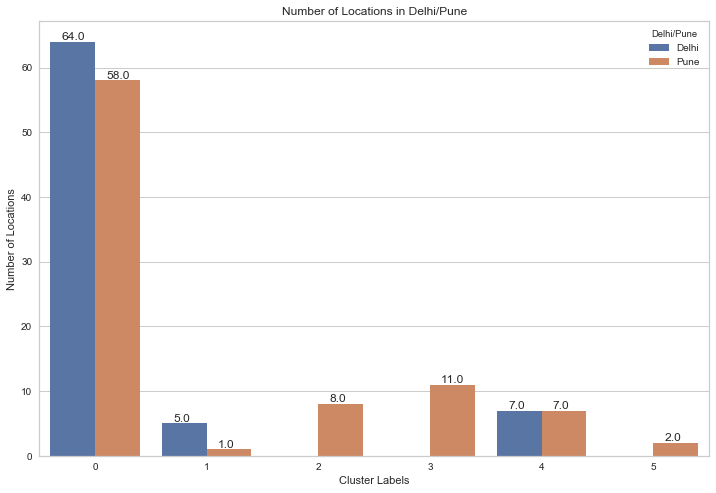

In [99]:
plt.figure(figsize=(12,8))
cluster = sns.countplot(x = 'Cluster Labels', hue = df_clus_ll['Delhi/Pune'],data = df_clus_ll, palette = 'deep' )
plt.title('Number of Locations in Delhi/Pune')
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Locations')

for p in cluster.patches:
        cluster.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.3))